### Achilles Edwin Alfred Saxby
### aes807

In [18]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.pylab import plt

%matplotlib inline

This is an artificial data set. It has five features and let's explore clustering models on this data set.

In [8]:
data_1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
data_1.head()

,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


#### 1. Visualize the data1 using PCA on a two dimensional plane and guess the number of clusters we could have from the plot.

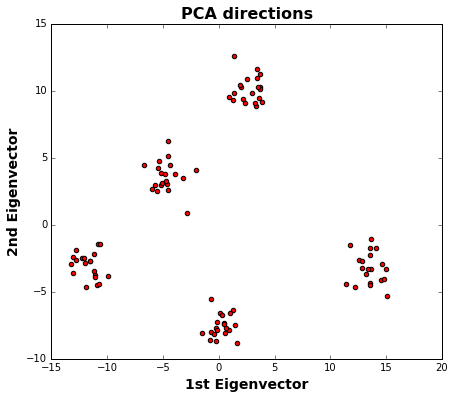

In [22]:
X = data_1.iloc[:,:]

n=5

pca = PCA(n)
Xproj = pca.fit_transform(X)

fig = plt.figure(figsize=(7, 6))

plt.scatter(Xproj[:, 0], Xproj[:, 1], c = 'r')
plt.title("PCA directions", fontsize = 16, fontweight = 'bold')
plt.xlabel("1st Eigenvector", fontsize = 14, fontweight = 'bold')
plt.ylabel("2nd Eigenvector",  fontsize = 14, fontweight = 'bold')

- Looking at the way the data is distributed according to the Eigenvectors and such, we can see that we have to start with 5 clusters.

#### 2. Use silhouette_score and elbow method to justify the optimal number k of clusters for K-means clustering. Report the k and give a short explanation.

- Silhouette Coefficient

In [17]:
X = data_1.iloc[:,:]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, random_state=128)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.436009251691
For n_clusters = 3, the average silhouette_score is :0.544062520653
For n_clusters = 4, the average silhouette_score is :0.647634554445
For n_clusters = 5, the average silhouette_score is :0.755843849066
For n_clusters = 6, the average silhouette_score is :0.6433044437


- Elbow Method

In [19]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k, random_state=128).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]
    
    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

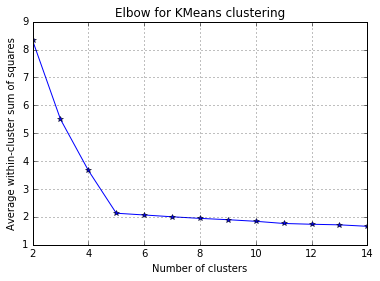

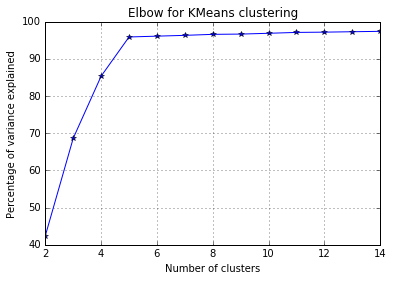

In [20]:
X = data_1.iloc[:,:]
elbow(X, range(2,15))

- From the above summary of the Silhouette Coefficient, we see the Silhouette Score is maximum at k = 5.
- In the Elbow method here, we can observe that the percentage of explained variance is less after k =5 that means here that the marginal gain is low. 
- Hence, looking at both the observations we can say that k =5 is the optimal value for number of clusters.

#### 3. Use K-means to cluster the data1 by the proper number of clusters k you found and report your result.

In [30]:
X = data_1.iloc[:,:]

n=5
#Optimal number of clusters found from above methods

dd=X
#The Data

#Training the model:
km=KMeans(random_state=128,n_clusters=n)
res=km.fit(dd)

#Result
print 'Clusters for the 100 input data points:'
print(res.labels_)

Clusters for the 100 input data points:
[3 4 1 1 3 1 0 2 4 2 3 0 4 3 0 2 0 3 4 0 4 3 2 2 3 0 0 2 2 0 4 4 0 3 4 4 0
 1 4 2 3 1 2 2 0 1 4 1 1 2 4 0 0 2 1 3 3 4 3 1 2 3 0 4 1 3 3 3 2 4 3 0 1 1
 1 4 4 2 0 4 4 1 0 2 1 2 2 2 3 1 1 1 1 3 0 3 0 2 4 0]


- The result we observe here is shown to us how the data that we have can be clustered into 5 clusters (0-4 being 5).
- This also shows us how the data is distributed accordingly

#### 4.  Visualize the clustering result. Please use the plot from part 1 and color the points by the new labels (the clustering results).

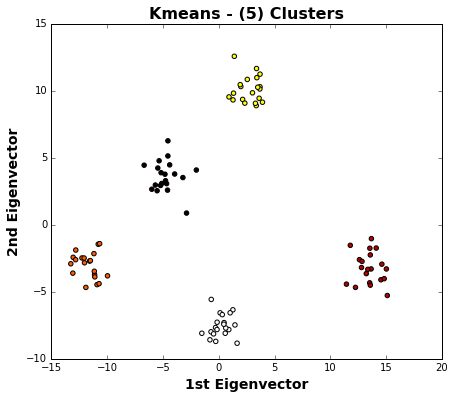

In [29]:
X = data_1.iloc[:,:]

n=5
pca = PCA(n)

Xproj = pca.fit_transform(X)

fig = plt.figure(figsize=(7, 6))

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res.labels_, cmap=plt.cm.hot)
plt.title("Kmeans - ({}) Clusters".format(n), fontsize = 16, fontweight = 'bold')
plt.xlabel("1st Eigenvector", fontsize = 14, fontweight = 'bold')
plt.ylabel("2nd Eigenvector",  fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'best' )

#### 5. Use Guassian Mixture model instead of K-means with the same k and repeat the part 3 and 4.

In [31]:
X = data_1.iloc[:,:]

n=5
#The number of clusters we initially found

dd=X
#The Data

#Gaussian Method
gm=GaussianMixture(n_components=n,random_state=128)
res1=gm.fit(dd)

#Result.
print 'Clusters for the 100 input data points:'
labels = res1.predict(dd)
print labels

Clusters for the 100 input data points:
[3 4 1 1 3 1 0 2 4 2 3 0 4 3 0 2 0 3 4 0 4 3 2 2 3 0 0 2 2 0 4 4 0 3 4 4 0
 1 4 2 3 1 2 2 0 1 4 1 1 2 4 0 0 2 1 3 3 4 3 1 2 3 0 4 1 3 3 3 2 4 3 0 1 1
 1 4 4 2 0 4 4 1 0 2 1 2 2 2 3 1 1 1 1 3 0 3 0 2 4 0]


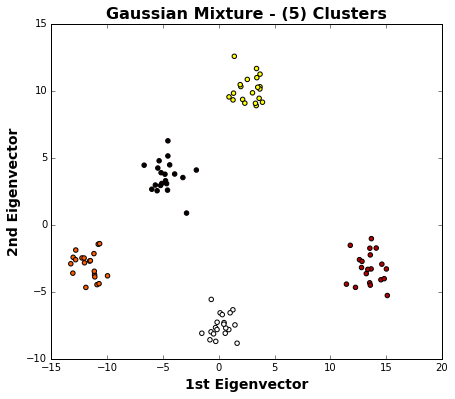

In [34]:
X = data_1.iloc[:,:]

n=5
pca = PCA(n)

Xproj = pca.fit_transform(X)

fig = plt.figure(figsize=(7, 6))

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=labels, cmap=plt.cm.hot)
plt.title("Gaussian Mixture - ({}) Clusters".format(n), fontsize = 16, fontweight = 'bold')
plt.xlabel("1st Eigenvector", fontsize = 14, fontweight = 'bold')
plt.ylabel("2nd Eigenvector",  fontsize = 14, fontweight = 'bold')
plt.legend(loc = 'best' )

This concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   


In [37]:
data_2 = pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")
data_2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6


In [40]:
# Converting object values(Categorical data) into numeric values

for column in data_2:
    if (data_2[column].dtypes) == 'object':
        le_column = preprocessing.LabelEncoder()
        #to convert into numbers
        data_2[column] = le_column.fit_transform(data_2[column])
        
data_2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,1,27,1,1,5.666667,180,...,False,False,False,False,False,False,False,2,4,6
1,2011,False,False,False,0,40,1,1,6.166667,225,...,False,False,True,True,False,False,False,0,9,6
2,2012,False,False,False,1,20,1,1,6.000000,200,...,False,False,False,False,False,False,False,2,1,6


#### 1. Use a clustering technique of your choice to determine how many unique records there are.

- Elbow Method

In [48]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k, random_state=128).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]
    
    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    # elbow curve
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.xticks(K)
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.xticks(K)
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

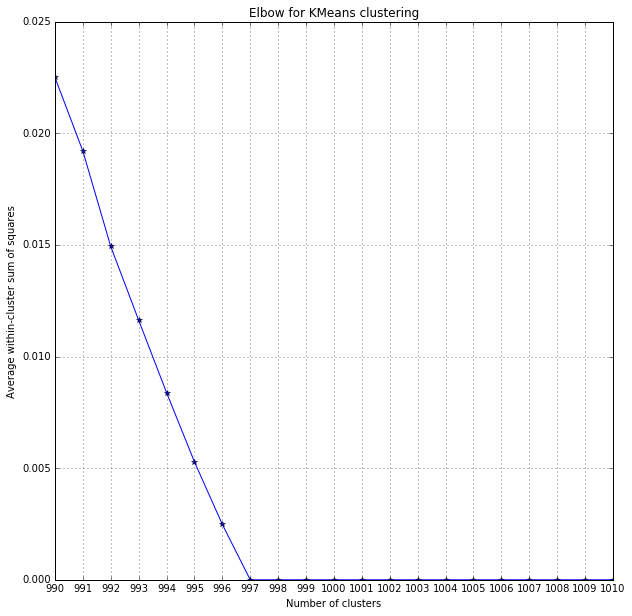

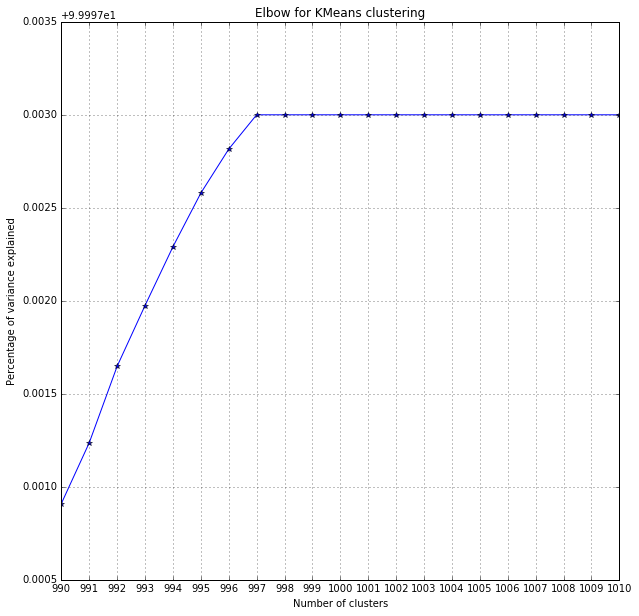

In [49]:
X = data_2.iloc[:,:]
elbow(X,range(990,1011))

- Looking at the graph that has been plotted using the Elbow Method - we can estimate and say that there are 997 Unique rows in the dataset

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?

In [50]:
print 'There are {} duplicate rows in the dataset'.format(data_2.duplicated().sum())

There are 72 duplicate rows in the dataset


In [51]:
print 'There are {} unique rows in the dataset'.format(len(data_2) - data_2.duplicated().sum())

There are 997 unique rows in the dataset


#### 3. Write a paragraph explaining parts a) and b)

- If we set number of clusters(K) equal to the number of datapoints and calculate the average sum of squares inside the cluster(since the number of clusters and datapoints are the same here), the sum of squares distance inside the clusters will be zero. 
- Gradually reducing the number of clusters by 1(if there are no duplicate records), this change should effect the cluster centroids and change the sum of squares distance inside the clusters.
- Using above logic, showing the sum of square distance inside the clusters and the percentage of explained variance for number of clusters between 990,1010. 
- The above graphs depict the same, we can see that the sum of squares distance inside the cluster is '0' till K >= 997 and the value changes from 997 downwards, which depicts that there are (1069-997) overlapping duplicate datapoints.
- Just to cross-check, we can see the exact number of duplicate rows in the results above this explanation.

#### The 311 data is not new for us. Let us use the scaled 311 data for question 3.
- Be careful! The first three columns are : zip code(zip_code), the average income(mean), and the average housing price(sale_price) 

In [62]:
data_3=pd.read_csv("http://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/HW4_Q3.csv").iloc[:,1:]
data_3=pd.concat((data_3.loc[:,["zip","mean","sale_price"]],data_3.loc[:,"Adopt A Basket":]),axis=1)
data_3.head(3)

,zip,mean,sale_price,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,Asbestos,BEST Site Safety,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,10001,123112.0,1950000.0,0.000000,0.001253,0.004762,0.000000,0.000251,0.004637,0.000376,...,0.0,0.000125,0.005263,0.001003,0.004511,0.001378,0.000000,0.046115,0.0,0.0
1,10002,NaN,NaN,0.000081,0.000486,0.003730,0.000000,0.000811,0.001622,0.000405,...,0.0,0.000324,0.003892,0.004784,0.006649,0.000730,0.000243,0.030649,0.0,0.0
2,10003,139330.0,4981025.0,0.000000,0.000740,0.004935,0.000247,0.000576,0.002303,0.000329,...,0.0,0.000000,0.003948,0.003043,0.010527,0.000658,0.000576,0.029114,0.0,0.0


In [63]:
data_3.shape

(178, 180)

#### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided.  Report the number of zip codes in each clusters.

In [64]:
n=4
#Taking the number of clusters.

#Kmeans
KM = KMeans(n_clusters = n, random_state = 175)
KM.fit(data_3.iloc[:,3:])
res_KM = KM.predict(data_3.iloc[:,3:])

#merge the result with zipcodes for graph plotting
res_KM = pd.concat((data_3.loc[:,'zip'],pd.DataFrame(res_KM)),axis=1)
res_KM.head()

,zip,0
0,10001,2
1,10002,2
2,10003,2
3,10004,2
4,10005,2


In [65]:
res_KM.columns = ['zip', 'cluster']
res_KM.head()

,zip,cluster
0,10001,2
1,10002,2
2,10003,2
3,10004,2
4,10005,2


In [67]:
res_KM = pd.concat((res_KM.loc[:,'cluster'],res_KM.loc[:,'zip']),axis=1)
print 'The number of zip codes for every cluster is: '
print res_KM.cluster.value_counts()

The number of zip codes for every cluster is: 
0    78
1    45
2    31
3    24
Name: cluster, dtype: int64


#### 2. Calculate the average income and average housing price for each cluster you get from part 1.

In [68]:
res_KM = pd.concat((res_KM.loc[:,:], data_3.loc[:,['mean','sale_price']]),axis=1)

In [69]:
res_KM.head()

,cluster,zip,mean,sale_price
0,2,10001,123112.0,1950000.0
1,2,10002,NaN,NaN
2,2,10003,139330.0,4981025.0
3,2,10004,NaN,NaN
4,2,10005,NaN,NaN


- Some of the average income and average housing price entries are NaN entries.
- We are considering these points in the cluster.
- So a change has to be done to make sure that the NaN values are not counted wrong.
- Dividng the sum of average income and housing price by all the number of points in the cluster(even the points with NaN entries for income and housing price) - we can see what the values actually are and how they can be calculated accordingly

In [71]:
for i in range(0,4):
    print '\nThe average income in cluster {0} is {1}'.\
    format(i, res_KM[res_KM.cluster == i]['mean'].sum() / len(res_KM[res_KM.cluster == i]))
    
    print 'The average housing price in cluster {0} is {1}'.\
    format(i, res_KM[res_KM.cluster == i]['sale_price'].sum() / len(res_KM[res_KM.cluster == i]))


The average income in cluster 0 is 61464.474359
The average housing price in cluster 0 is 514423.3854

The average income in cluster 1 is 30854.2
The average housing price in cluster 1 is 374970.199076

The average income in cluster 2 is 79551.0322581
The average housing price in cluster 2 is 4004584.83788

The average income in cluster 3 is 72687.5
The average housing price in cluster 3 is 473415.05054


#### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY).

In [80]:
zipsf = shp.Reader('NY.shp')
zipsf_records = zipsf.records()
zipsf_shape = zipsf.shapeRecords()

def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zip']
        x[key]=result.loc[i,'cluster']

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (10,10)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("Clustering results on the map of NYC", fontweight = 'bold')

    clum_num=len(result.loc[:,'cluster'].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

/Users/achillessaxby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


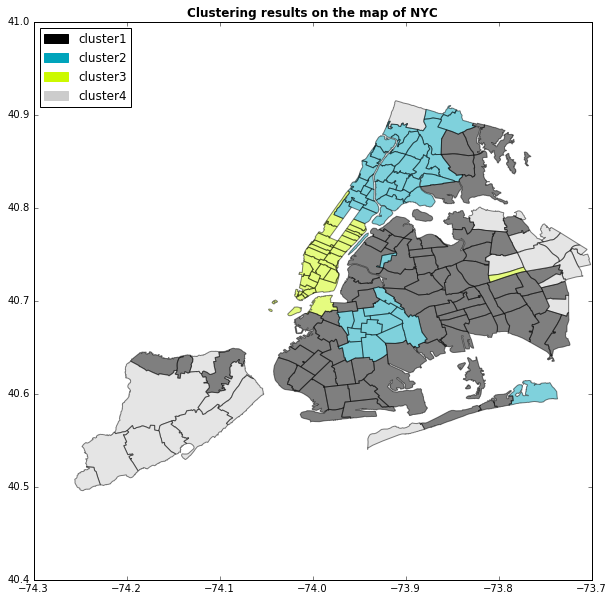

In [81]:
plot_on_map(res_KM)

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 

In [93]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
data_4.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4
3,2012,False,False,False,native.american,14,thin,male,5.500000,140,...,False,True,True,False,False,False,False,Tuesday,October,4
4,2012,False,False,False,hispanic,21,medium,male,5.750000,145,...,True,True,True,True,False,False,False,Tuesday,June,5


#### 1. Which are the two features where errors were introduced?

In [84]:
# Converting object values(Categorical data) into numeric values
for column in data_4:
    if (data_4[column].dtypes) == 'object':
        le_column = preprocessing.LabelEncoder()
        #to convert into numbers
        data_4[column] = le_column.fit_transform(data_4[column])

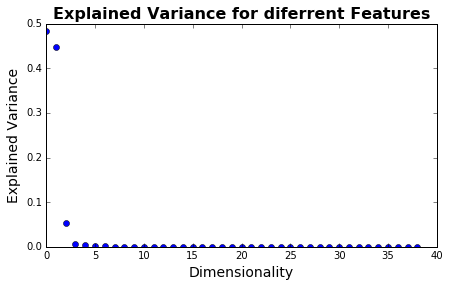

array([  4.82323730e-01,   4.46664111e-01,   5.35815911e-02,
         6.30856106e-03,   4.25822304e-03,   2.17326623e-03,
         1.87161598e-03,   4.98817206e-04,   4.48930758e-04,
         2.14416196e-04,   1.78374935e-04,   1.33029344e-04,
         1.26563578e-04,   1.25458006e-04,   1.11591819e-04,
         9.36826311e-05,   8.64102387e-05,   8.09359827e-05,
         7.37929421e-05,   6.77727724e-05,   6.46804858e-05,
         5.72620240e-05,   5.47561884e-05,   4.90786584e-05,
         4.87125225e-05,   3.85167416e-05,   3.48513719e-05,
         3.30921640e-05,   2.95843838e-05,   2.93540080e-05,
         2.77155495e-05,   2.56529913e-05,   1.99995796e-05,
         1.92847404e-05,   1.48399255e-05,   1.27607867e-05,
         1.01199327e-05,   7.56604802e-06,   1.29709045e-06])

In [90]:
X = data_4.iloc[:,:]

n=39

pca = PCA(n)
Xproj = pca.fit_transform(X)

eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.explained_variance_

plt.figure(figsize=(7,4))
plt.plot(np.arange(n), eigenvalues, 'o', )
plt.title("Explained Variance for diferrent Features", fontsize = 16, fontweight = 'bold')
plt.xlabel("Dimensionality",fontsize = 14)
plt.ylabel("Explained Variance", fontsize = 14)
plt.show()
eigenvalues

#### 2. How many unique records there are?

In [91]:
print 'There are {} duplicate rows in the dataset'.format(data_4.duplicated().sum())

There are 2 duplicate rows in the dataset


In [92]:
print 'There are {} unique rows in the dataset'.format(len(data_4) - data_4.duplicated().sum())

There are 1098 unique rows in the dataset


#### 3. Write a paragraph explaining what you did.

- Using the idea of first calculating the number of duplicate rows in the dataset and using that calculation to find out the actual number of original and unique rows in the dataset